인스타그램 로그인

In [18]:
from selenium import webdriver
driver = webdriver.Chrome('C:\chrome\chromedriver.exe')
import time

driver.get('http://www.instagram.com')
time.sleep(2)

In [6]:
import time
email = 'erdosnumber0@gmail.com' ## < 아이디 수정해서 입력 >
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'qpqp1010' ## < 비밀번호 수정해서 입력 >
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

인스타 검색 결과 URL

In [7]:
def insta_searching(word):
    url = 'https://instagram.com/explore/tags/' +word
    return url

In [8]:
word = '취미그림'
url = insta_searching(word)
driver.get(url)

In [11]:
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)
    
select_first(driver)

게시글 정보 가져오기

In [ ]:
import re
from bs4 import BeautifulSoup
import unicodedata # 내가 작성 중인

def get_content(driver):
    # 현재 페이지의 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    # 본문 내용 가져오기
    try: # 내용이 있으면 출력
        content = soup.select('div.C4VMK>span')[0].text
        content = unicodedata.normalize('NFC', content) # macOS인 경우 한글 자음 모음이 분리되는 현ㅅ애이 있어 합쳐서 처리하는 NFC 방식 코드 추가
    except: # 없으면 빈칸
        content = ' '
        
    # 해시태그 가져오기(정규표현식 활용해야 함)
    tags = re.findall(r'#[^ㄱ-ㅎ|ㅏ-ㅣ|가-힣|A-Z|a-z|0-9|.|,| ]]+', content)
    
    # 작성일자 정보 가져오기
    date = soup.select('time._FH9sR.Nzb55')[0]['datetime'][:10] # 예제랑 다르니 체크해봐야겠음
    
    # 좋아요 수 가져오기
    try:
        like = soup.select('div.')

In [12]:
# 예제 5-7 게시글 정보 가져오기
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    # ① 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # ② 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ' '
    # ③ 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    # ④ 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # ⑤ 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # ⑥ 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    # ⑦ 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['얼굴 연습 ^///^ 진짜 열심히 그렸다!...#drawing #artwork #illustration #painting #girl #characterdesign #digitalpainting #일러스트 #그림스타그램 #캐릭터디자인 #취미그림',
 '2021-05-04',
 0,
 '',
 ['#drawing',
  '#artwork',
  '#illustration',
  '#painting',
  '#girl',
  '#characterdesign',
  '#digitalpainting',
  '#일러스트',
  '#그림스타그램',
  '#캐릭터디자인',
  '#취미그림']]

다음 게시글 열기

In [13]:
def move_next(driver):
    right=driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

여러 개시글 정보 수집하기

- 크롬 브라우저 열기
- 인스타그램 검색 페이지 url 만들기
- 검색페이지 접속하기
- 첫 번째 게시물 클릭하기
- 비어있는 변수 만들기(results)
- 게시글 정보 가져오기 get_content()사용자 함수
- 게시글 정보 변수(results)에 추가하기 -> 다음 게시글 (반복)
- 게시글 정보 수집 완료(results)

In [20]:
# 예제 5-9 인스타그램 크롤링 ①
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# ① 크롬 브라우저 열기
driver = webdriver.Chrome('C:\chrome\chromedriver.exe') 

# 추가) 인스타그램 접속후, 로그인 하기  - 
driver.get('http://www.instagram.com')
time.sleep(3)


######## 인스타 계정 로그인이 필요합니다 #########
email = 'erdosnumber0@gmail.com'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'qpqp1010' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

취미그림 103,475

In [21]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
word = "취미그림"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 200      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

[['얼굴 연습 ^///^ 진짜 열심히 그렸다!...#drawing #artwork #illustration #painting #girl #characterdesign #digitalpainting #일러스트 #그림스타그램 #캐릭터디자인 #취미그림', '2021-05-04', 0, '', ['#drawing', '#artwork', '#illustration', '#painting', '#girl', '#characterdesign', '#digitalpainting', '#일러스트', '#그림스타그램', '#캐릭터디자인', '#취미그림']], ['(I uploaded a drawing video on my YouTube channel.제 유튜브 채널에 채색 영상을 업로드 했어요)전체적으로 컬러가 넘 진해져버렸어요😂일하고 같이 하느라 하이라이트도 의도하지 않게 힘이 넘 뽝 들어가고..😅완성될때쯤 엄마 오셔서 급하게 배경 색 넣느라 배경도 진해지고-배경은 여리여리한게 좋은데 쫌만 방심하면 훅 진해져서 정신줄 잘 잡고 있어야 할듯해요~😆이번 그림은..총체적 난국이지 않을까 싶습니다😂😂😂#수채화 #음식일러스트 #수채화일러스트 #음식그림 #감성수채화 #디저트그림 #아날로그감성 #와플 #취미그림 #컬러링북 #watercolor #aquarela #watercolour #foodillustration #waterblog #foodillustrator #foodart #art_gallery #foodsketch #theydrawandcook #artwork #drawing #水彩画', '2021-04-01', 0, '', ['#수채화', '#음식일러스트', '#수채화일러스트', '#음식그림', '#감성수채화', '#디저트그림', '#아날로그감성', '#와플', '#취미그림', '#컬러링북', '#watercolor', '#aquarela', '#watercolour', '#foodillustration', '#waterblog', '#foodillustrator', '#f

In [56]:
# 예제 5-11 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./dataset/1_crawling_hobby.xlsx',index=False)


In [24]:
results_df.head()

,content,data,like,place,tags
0,얼굴 연습 ^///^ 진짜 열심히 그렸다!...#drawing #artwork #i...,2021-05-04,0,,"[#drawing, #artwork, #illustration, #painting,..."
1,(I uploaded a drawing video on my YouTube chan...,2021-04-01,0,,"[#수채화, #음식일러스트, #수채화일러스트, #음식그림, #감성수채화, #디저트그..."
2,🎊친구는 아름다운 그림을 그려 주셔서 감사합니다 🎨 나는 당신의 모든 예술 작품을 ...,2021-04-09,0,"Seoul, Korea","[#feature31, #강한나의볼륨을높여요, #라디오, #볼륨을높여요, #강한나,..."
3,물주는 소녀Watering plants#작업중 #wip 외주 작업중인 그림인데색감이...,2021-04-24,0,,"[#작업중, #wip, #일러스트, #workinprogress, #illustra..."
4,@ggori_byuri 작가님의 지목으로 #LRSA 에 동참합니다! 동양인 혐오를 ...,2021-04-26,0,,"[#LRSA, #LoveRespectSupportAsians, #LoveRespec..."


일러스트 8,982,999

In [25]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
word = "일러스트"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 200      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

[['#illustration #illust #bw #draw #drawing #desenho #sketch #artworks #boceto #oc #penart #bnw #ilustración #doodle #dibujos #dessin #일러스트 #Ilustração #lineart #일러스트레이터 #simpleart #illustrator #wondami0907 #그림 #teckning #inktober #minimalism #artsy', '2021-05-09', 0, '', ['#illustration', '#illust', '#bw', '#draw', '#drawing', '#desenho', '#sketch', '#artworks', '#boceto', '#oc', '#penart', '#bnw', '#ilustración', '#doodle', '#dibujos', '#dessin', '#일러스트', '#Ilustração', '#lineart', '#일러스트레이터', '#simpleart', '#illustrator', '#wondami0907', '#그림', '#teckning', '#inktober', '#minimalism', '#artsy']], ['이건 사실 요즘 내 생각이다#슌툰 #일상툰', '2021-05-09', 0, '', ['#슌툰', '#일상툰']]]


In [55]:
# 예제 5-11 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./dataset/2_crawling_hobby.xlsx',index=False)

크로키 383500

In [28]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
import time

start = time.time()

word = "크로키"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 200      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

end = time.time() - start
print("used time: %dm%ds" % divmod(end,60))

[['샤프드로잉#illustration #sketch #drawing #pencildrawing #painting #mono #dailydrawing #pencil #portrait #croquis #instaart #lighting #practice #pencilsketch #portraitdrawing #일러스트 #드로잉 #스케치 #연필드로잉 #연필그림 #연필 #그림 #크로키 #인물화 #습작 #미술 #소묘 #그림스타그램 #흑백 #소묘', '2021-04-28', 0, '', ['#illustration', '#sketch', '#drawing', '#pencildrawing', '#painting', '#mono', '#dailydrawing', '#pencil', '#portrait', '#croquis', '#instaart', '#lighting', '#practice', '#pencilsketch', '#portraitdrawing', '#일러스트', '#드로잉', '#스케치', '#연필드로잉', '#연필그림', '#연필', '#그림', '#크로키', '#인물화', '#습작', '#미술', '#소묘', '#그림스타그램', '#흑백', '#소묘']], ['2021.05.05 어린이날 선물 줘.........#그림 #그림스타그램 #그림그리기 #낙서 #낙서스타그램 #손그림 #크로키 #연필그림 #연필 #drawing #draw #croquis #좋아요반사 #좋반 #맞팔 #그림계정맞팔 #followforfollowback #follow #07년생', '2021-05-05', 0, '', ['#그림', '#그림스타그램', '#그림그리기', '#낙서', '#낙서스타그램', '#손그림', '#크로키', '#연필그림', '#연필', '#drawing', '#draw', '#croquis', '#좋아요반사', '#좋반', '#맞팔', '#그림계정맞팔', '#followforfollowback', '#follow', '#07년생']]]
used time: 11m20s


In [54]:
# 예제 5-11 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./dataset/3_crawling_hobby.xlsx',index=False)

드로잉 5490156

In [30]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
import time

start = time.time()

word = "드로잉"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 200      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

end = time.time() - start
print("used time: %dm%ds" % divmod(end,60))

[['#드로잉#펜드로잉#수채드로잉#건물드로잉#건물풍경드로잉 #여의도성모병원#여의도성모병원 사회사업팀#손그림. 요청받아 그리는 그림은 심리적 압박이 장난아니네. 아직도 머리아프다. 이런 구조 건물. 창문 많은 아이들은 스스로는 절대절대 그리지 않을 건물이지요.  그래도 맘에 들어하셔서 안심하고  요청그림은 하지 않는 걸로••••😅😅😅', '2021-05-09', 0, '', ['#드로잉', '#펜드로잉', '#수채드로잉', '#건물드로잉', '#건물풍경드로잉', '#여의도성모병원', '#여의도성모병원', '#손그림.']], ['#드로잉#펜드로잉#수채드로잉#손그림#베란다 화분~~ # 사진; 지니쌤 오픈카톡방의  김형옥(호호)님.  햇살좋은 창가에 예쁜 화분들 키우고 싶당. 이사올때 데려온  호야가 이제 자리잡고 새순을 키우고 있는데 기특하고 미안하고 그러네요. 밴친이산 호호언니 사진으로 식물 키우고픈 마음을 대신해봅니다', '2021-05-09', 0, '', ['#드로잉', '#펜드로잉', '#수채드로잉', '#손그림', '#베란다']]]
used time: 11m24s


In [53]:
# 예제 5-11 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./dataset/4_crawling_hobby.xlsx',index=False)

프로크리에이터 14105

In [32]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
import time

start = time.time()

word = "프로크리에이터"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 200      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

end = time.time() - start
print("used time: %dm%ds" % divmod(end,60))

[['# 도라지꽃 / 글 김도연님 / 그림 가림 오현진새벽만개 속에서도그리움은 이리도고운색 입니다야속하게#이 시를 알고 난 이후부터는 그리움 하면 보라색, 보라색하면 도라지꽃을 앞으로는 연상하게 될 것 같습니다.저에겐 큰 감동입니다♡#도라지꽃🌸 #김도연 #칭찬시인 #칭찬시인김도연님诗 #아름다운시 #감동감동❤️ #새벽만개 #그리움#꽃말 #영원한사랑💕#고운색#보라꽃#그리움을담다 #디지털캘리 #아이패드프로 #프로크리에이터 #김해캘리그라피#율하 #장유 #가림현진 #진캘리', '2021-02-26', 0, '', ['#이', '#도라지꽃🌸', '#김도연', '#칭찬시인', '#칭찬시인김도연님诗', '#아름다운시', '#감동감동❤️', '#새벽만개', '#그리움', '#꽃말', '#영원한사랑💕', '#고운색', '#보라꽃', '#그리움을담다', '#디지털캘리', '#아이패드프로', '#프로크리에이터', '#김해캘리그라피', '#율하', '#장유', '#가림현진', '#진캘리']], ['프로크리에이트로 난 치기..#아이패드드로잉#프로크리에이터#ipad #procreate #procreatedrawing#orchid #nationalgallery#난#동양화 #orientalpainting #watercolor #watercolorlandscape#urbansketch#수채화#풍경화#나름어반#어반스케치#spring #봄#portraitpainting인물수채화#수채화#holbein#watercolorportrait##watercolorportraits#watercolorpainting', '2021-04-07', 0, '', ['#아이패드드로잉', '#프로크리에이터', '#ipad', '#procreate', '#procreatedrawing', '#orchid', '#nationalgallery', '#난', '#동양화', '#orientalpainting', '#watercolor', '#watercolorlandscape', '#urbansketch', '#수채화', '#

아이패드그림 308,139

In [52]:
# 예제 5-11 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./dataset/5_crawling_hobby.xlsx',index=False)

In [34]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
import time

start = time.time()

word = "아이패드그림"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 200      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

end = time.time() - start
print("used time: %dm%ds" % divmod(end,60))

[['정면얼굴 😀갑자기 완성작-#인물화 #초상화 #드로잉 #그림그리기 #취미미술 #아이패드드로잉 #아이패드그림 #프로크리에이트 #아트스타그램 #일러스트레이터 #일러스트그림 #일러스트 #크로키 #그림 #미술 #drawing #painter #ipaddrawing #character #arte #digitalart #art #digitaldrawing #Portrait #paint #illustration #artworks #artstagram #drawingstagram #아트스타그램', '2021-05-07', 0, '', ['#인물화', '#초상화', '#드로잉', '#그림그리기', '#취미미술', '#아이패드드로잉', '#아이패드그림', '#프로크리에이트', '#아트스타그램', '#일러스트레이터', '#일러스트그림', '#일러스트', '#크로키', '#그림', '#미술', '#drawing', '#painter', '#ipaddrawing', '#character', '#arte', '#digitalart', '#art', '#digitaldrawing', '#Portrait', '#paint', '#illustration', '#artworks', '#artstagram', '#drawingstagram', '#아트스타그램']], ['가끔씩 남들에 의해 나의 시야가 가려지곤 할 때 스스로에게 자신없는 의심과 질문을 계속 쏟아낸다. 그래도 언젠가 빛날 그 순간에 웃고있는 내 얼굴을 상상하며 오늘도 묵묵히 나아간다.....#감성#손그림#그림#드로잉#일상#작업#감성글귀#그림스타그램#외주#일러스트#낙서#공감#아이패드그림#그림계정맞팔#소몽#daily#sketch#drawing#illust#illustration#digitalart#ipad#procreate', '2021-05-09', 0, '', ['#감성', '#손그림', '#그림', '#드로잉', '#일상', '#작업', '#감성글귀', '#그림스타그램', '#외주', '#일러스트', '#낙서', '#공감',

In [50]:
# 예제 5-11 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./dataset/6_crawling_hobby.xlsx',index=False)

취미 이모티콘- 없음
그림스타그램(4,144,442)

In [40]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
import time

start = time.time()

word = "그림스타그램"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 200     # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

end = time.time() - start
print("used time: %dm%ds" % divmod(end,60))

[['💖재업로드와 프로필 사진사용, 도용 금지☁️Do not reload or use my artwork #artwork #color #commission #illustration #illust #그림 #커미션 #일러스트 #그림스타그램 #procreate #ipadpro #applepencil #digitalart #art #digitalpainting', '2021-05-08', 0, '', ['#artwork', '#color', '#commission', '#illustration', '#illust', '#그림', '#커미션', '#일러스트', '#그림스타그램', '#procreate', '#ipadpro', '#applepencil', '#digitalart', '#art', '#digitalpainting']], ['🌙💫✨...#그림 #그림스타그램 #일러스트 #일러스트그램 #드로잉 #캐릭터 #캐릭터디자인 #손그림 #색연필 #색연필그림', '2021-05-08', 0, '', ['#그림', '#그림스타그램', '#일러스트', '#일러스트그램', '#드로잉', '#캐릭터', '#캐릭터디자인', '#손그림', '#색연필', '#색연필그림']]]
used time: 11m17s


In [48]:
# 예제 5-11 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./dataset/7_crawling_hobby.xlsx',index=False)

통합저장

In [57]:
insta_df = pd.DataFrame([])
folder = './dataset/'
f_list = ['1_crawling_hobby.xlsx',
          '2_crawling_hobby.xlsx',
          '3_crawling_hobby.xlsx',
          '4_crawling_hobby.xlsx',
          '5_crawling_hobby.xlsx',
          '6_crawling_hobby.xlsx',
          '7_crawling_hobby.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    insta_df = insta_df.append(temp)
    
insta_df.columns = ['content', 'data', 'like', 'place', 'tags']

In [58]:
insta_df.head()

,content,data,like,place,tags
0,"💖재업로드와 프로필 사진사용, 도용 금지☁️Do not reload or use m...",2021-05-08,0.0,NaN,"['#artwork', '#color', '#commission', '#illust..."
1,🌙💫✨...#그림 #그림스타그램 #일러스트 #일러스트그램 #드로잉 #캐릭터 #캐릭터...,2021-05-08,0.0,NaN,"['#그림', '#그림스타그램', '#일러스트', '#일러스트그램', '#드로잉',..."
2,😶...#그림스타그램 #그림 #일러스트 #일러스트레이터 #자캐 #OC #art #a...,2021-05-09,0.0,NaN,"['#그림스타그램', '#그림', '#일러스트', '#일러스트레이터', '#자캐',..."
3,쉿~~🤭...#그림 #일러스트 #드로잉 #색연필 #색연필그림 #그림스타그램 #일러스...,2021-05-09,0.0,NaN,"['#그림', '#일러스트', '#드로잉', '#색연필', '#색연필그림', '#그..."
4,⠀응가전에 미리 해놓는건가...?🤔🤔🤔⠀⠀#봄동이제철 #봄동 #봄동툰 #재패니즈스피...,2021-05-09,0.0,NaN,"['#봄동이제철', '#봄동', '#봄동툰', '#재패니즈스피츠', '#스피츠', ..."


In [59]:
insta_df.drop_duplicates(subset = ['content'], inplace=True)

In [60]:
insta_df.to_excel('./dataset/insta_df.xlsx', index=False)

In [1]:
import pandas as pd
df =pd.read_excel('./dataset/insta_df.xlsx')
df['tags'][:3] # 3줄만 확인

0    ['#artwork', '#color', '#commission', '#illust...
1    ['#그림', '#그림스타그램', '#일러스트', '#일러스트그램', '#드로잉',...
2    ['#그림스타그램', '#그림', '#일러스트', '#일러스트레이터', '#자캐',...
Name: tags, dtype: object

In [2]:
# 예제 5-15 해시태그 통합 저장하기
tags_total = []

for tags in df['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag) # for 문으로 tag_total 리스트에 추가

In [3]:
from collections import Counter
tag_counts = Counter(tags_total) # 그룹 내 원소의 종류별로 빈도서 집계

In [4]:
tag_counts.most_common(50)

[('#그림스타그램', 141),
 ('#그림', 121),
 ('#일러스트', 90),
 ('#drawing', 84),
 ('#드로잉', 69),
 ('#art', 65),
 ('#illust', 55),
 ('#illustration', 53),
 ('#doodle', 44),
 ('#draw', 44),
 ('#손그림', 43),
 ('#artwork', 41),
 ('', 40),
 ('#취미', 29),
 ('#낙서', 27),
 ('#イラスト', 24),
 ('#painting', 21),
 ('#hobby', 21),
 ('#digitalart', 20),
 ('#캐릭터', 20),
 ('#그림쟁이', 19),
 ('#digitaldrawing', 18),
 ('#그림계정', 18),
 ('#미술', 18),
 ('#sketch', 17),
 ('#오일파스텔', 17),
 ('#일상', 17),
 ('#그림그리기', 17),
 ('#character', 16),
 ('#디지털드로잉', 16),
 ('#스케치', 15),
 ('#그림계정맞팔', 15),
 ('#artist', 13),
 ('#디자인', 13),
 ('#illustrator', 12),
 ('#design', 12),
 ('#drawing🎨', 12),
 ('#일러스트레이션', 11),
 ('#oilpastel', 11),
 ('#oilpasteldrawing', 11),
 ('#絵', 11),
 ('#일러스트그램', 10),
 ('#그림연습', 10),
 ('#좋아요', 10),
 ('#artstagram', 10),
 ('#좋반', 9),
 ('#procreate', 8),
 ('#일러스트레이터', 8),
 ('#자캐', 8),
 ('#pendrawing', 8)]

In [7]:
# 예제 5-18 데이터 정제하기
STOPWORDS = ['','#그림계정맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)


[('#그림스타그램', 141),
 ('#그림', 121),
 ('#일러스트', 90),
 ('#drawing', 84),
 ('#드로잉', 69),
 ('#art', 65),
 ('#illust', 55),
 ('#illustration', 53),
 ('#doodle', 44),
 ('#draw', 44),
 ('#손그림', 43),
 ('#artwork', 41),
 ('#취미', 29),
 ('#낙서', 27),
 ('#イラスト', 24),
 ('#painting', 21),
 ('#hobby', 21),
 ('#digitalart', 20),
 ('#캐릭터', 20),
 ('#그림쟁이', 19),
 ('#digitaldrawing', 18),
 ('#그림계정', 18),
 ('#미술', 18),
 ('#sketch', 17),
 ('#오일파스텔', 17),
 ('#일상', 17),
 ('#그림그리기', 17),
 ('#character', 16),
 ('#디지털드로잉', 16),
 ('#스케치', 15),
 ('#artist', 13),
 ('#디자인', 13),
 ('#illustrator', 12),
 ('#design', 12),
 ('#drawing🎨', 12),
 ('#일러스트레이션', 11),
 ('#oilpastel', 11),
 ('#oilpasteldrawing', 11),
 ('#絵', 11),
 ('#일러스트그램', 10),
 ('#그림연습', 10),
 ('#좋아요', 10),
 ('#artstagram', 10),
 ('#좋반', 9),
 ('#procreate', 8),
 ('#일러스트레이터', 8),
 ('#자캐', 8),
 ('#pendrawing', 8),
 ('#펜드로잉', 8),
 ('#일러스타그램', 7)]

막대 차트

In [5]:
# 예제 5-19 시각화 라이브러리 호출 및 환경 설정(한글 폰트) - 한글 깨지지 않게
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


In [8]:
# 예제 5-20 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

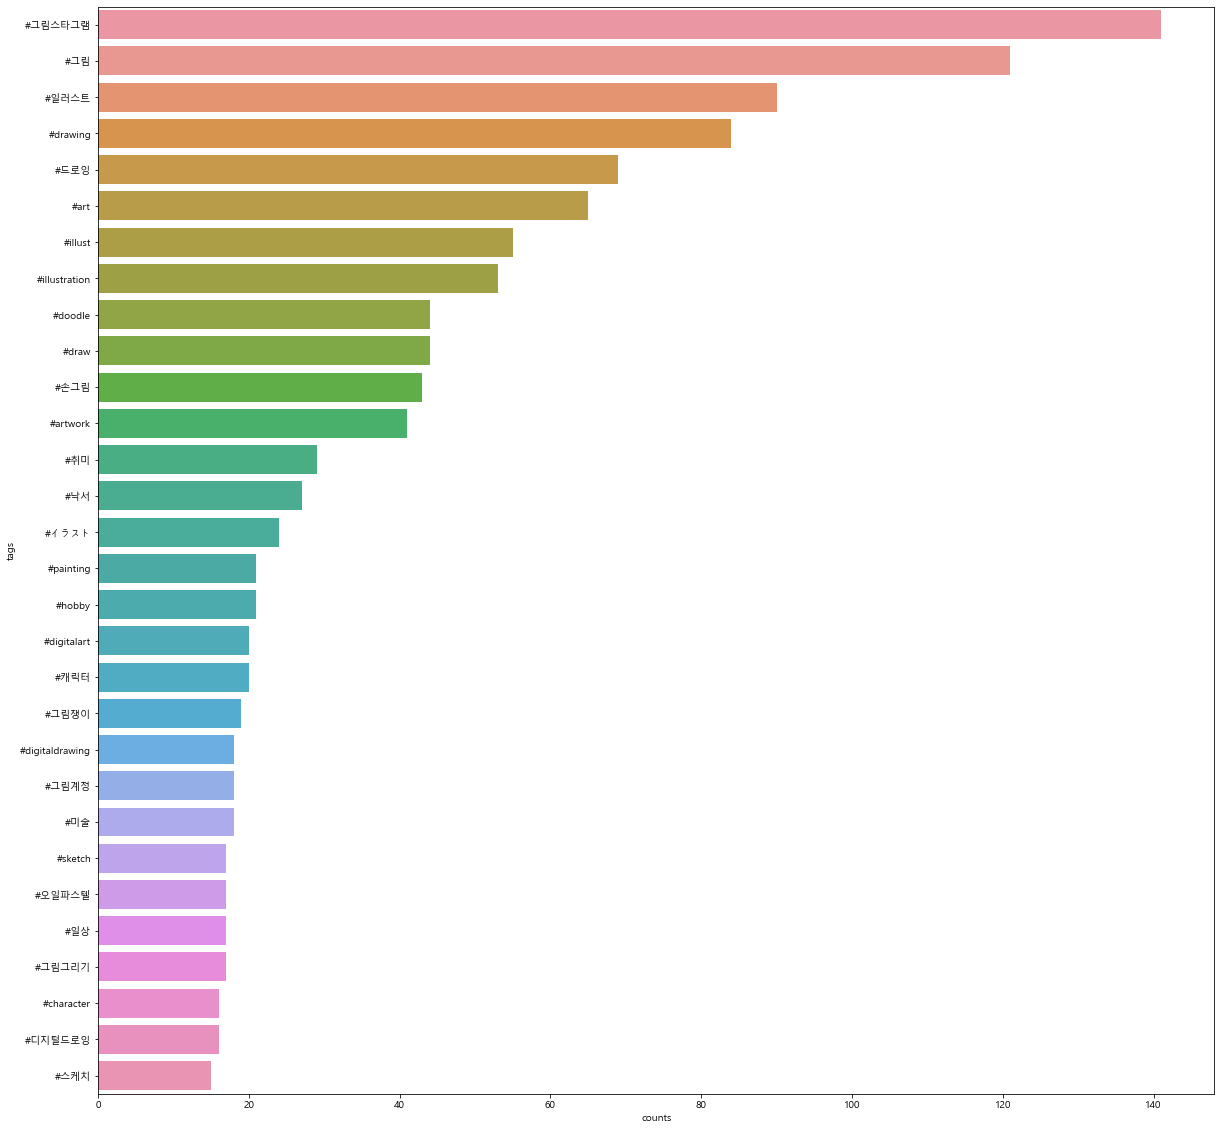

In [13]:
# 예제 5-21 막대 차트 그리기
plt.figure(figsize=(20,20)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [15]:
pip install wordcloud

In [18]:
# 예제 5-22 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud    # 에러시  ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


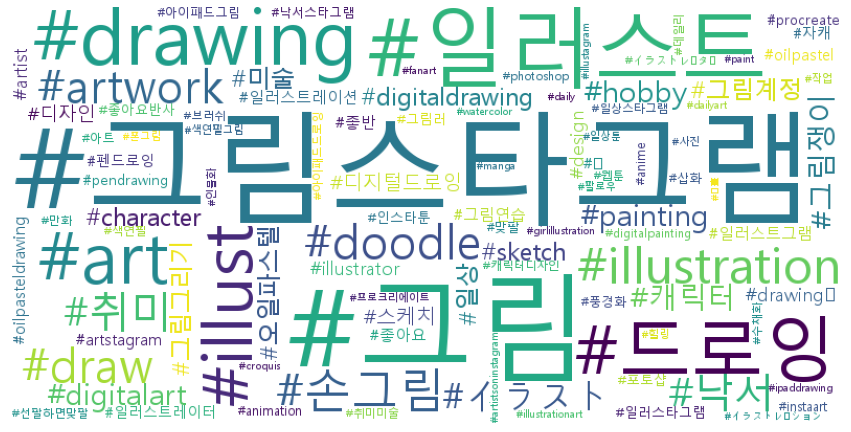

In [20]:
# 예제 5-23 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./dataset/2_tag-wordcloud.png')  